/Applications/anaconda3/envs/mude/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


hand
0.007444649368804898 0.03588000976899691 0.04271830760550096 0.10455774235112807 0.2825008632087786 0.5427941015470386
1.015895673850248


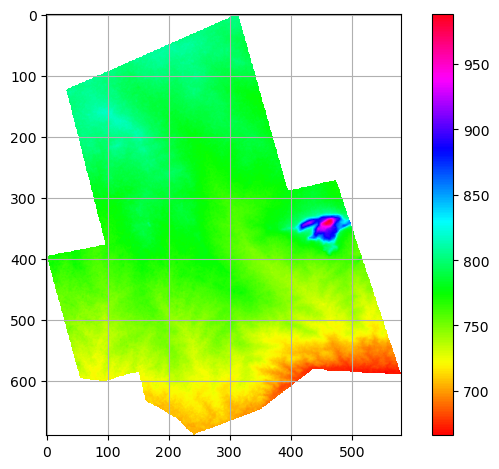

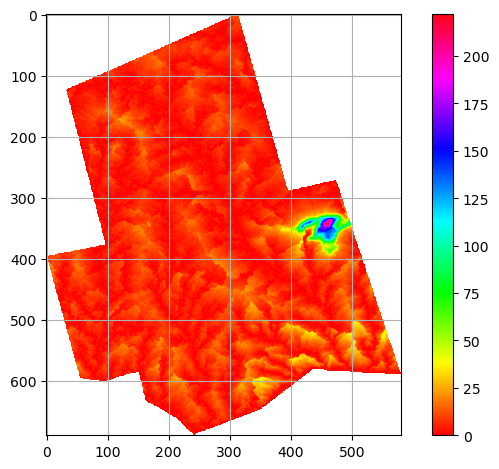

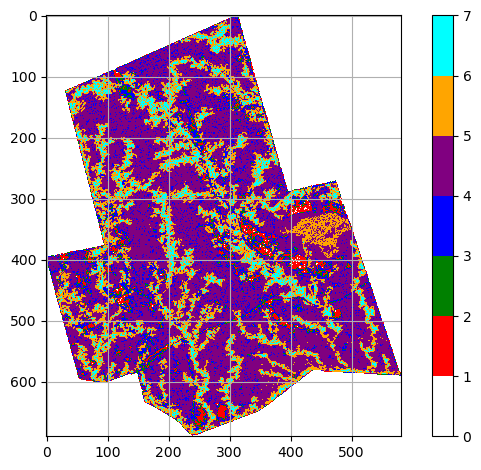

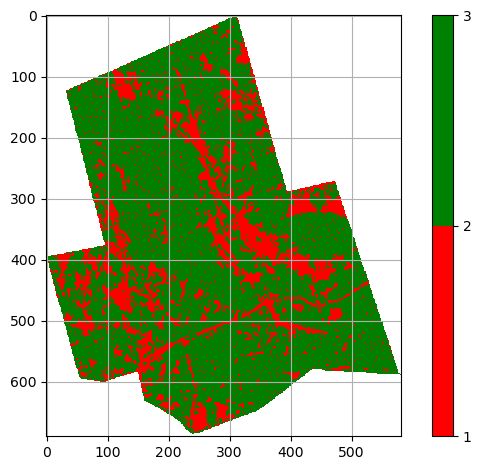

0.0


In [1]:
import numpy       as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from scipy.stats import linregress
warnings.simplefilter("ignore")
plt.rcParams["figure.autolayout"] = True
plt.rcParams['axes.grid'] = True

DEM=np.genfromtxt('maps/dem_converted.asc',  dtype=float, autostrip=True, skip_header=6)
slope=np.genfromtxt('maps/slope.asc',  dtype=float, autostrip=True, skip_header=6)
hand=np.genfromtxt('maps/HAND_use.asc',  dtype=float, autostrip=True, skip_header = 6)
basin=np.genfromtxt('maps/basin.asc',  dtype=float, autostrip=True, skip_header = 6)
classification=np.genfromtxt('maps/Classified.asc',  dtype=float, autostrip=True, skip_header = 9, usecols = range(2, 584))
#Btrying = np.genfromtxt('maps/B6_use.asc',  dtype=float, autostrip=True, skip_header = 9, usecols = range(2, 584))


#plot DEM
plt.figure(1)
DEM[DEM==65535]=np.nan
plt.imshow(DEM, cmap='hsv')
plt.colorbar()

#plot HAND

plt.figure(2)
print("hand")
hand[hand==-3.4028234663852885981e+38]=np.nan
plt.imshow(hand, cmap='hsv')
plt.colorbar()

slope[slope==-9999]=np.nan

#make landscape classification
hillslope_cl = (np.array(slope) > 5) & (np.array(classification) == 1)
#hillslope_cl = (np.array(classification) == 1)
plateau_cl = (np.array(hand) > 3) & (np.array(slope) < 5) & (np.array(classification) == 1)# slope
#plateau_cl =(np.array(classification) == 1)# slope 
wetland_cl = (np.array(hand) <= 3) & (np.array(classification) == 1)
# wetland_cl = (np.array(classification) == 1)


hillslope_un = (np.array(slope) > 5) & (np.array(classification) == 2)
#hillslope_un = (np.array(classification) == 2)
plateau_un = (np.array(hand) > 3) & (np.array(slope) < 5) & (np.array(classification) == 2)
# plateau_un = (np.array(classification) == 2)#
wetland_un = (np.array(hand) <= 3) & (np.array(classification) == 2)
# wetland_un =  (np.array(classification) == 2)
basin = np.array(basin)>0


#calculate percentages
hillslope_cl_per = float(np.sum(hillslope_cl))/np.sum(basin) # /sum(basin)
wetland_cl_per = float(np.sum(wetland_cl))/np.sum(basin)
plateau_cl_per = float(np.sum(plateau_cl))/np.sum(basin)
hillslope_un_per = float(np.sum(hillslope_un))/np.sum(basin) # /sum(basin)
wetland_un_per = float(np.sum(wetland_un))/np.sum(basin)
plateau_un_per = float(np.sum(plateau_un))/np.sum(basin)
print(hillslope_cl_per, wetland_cl_per, plateau_cl_per, hillslope_un_per, wetland_un_per, plateau_un_per)
print(np.sum([hillslope_cl_per, wetland_cl_per, plateau_cl_per, hillslope_un_per, wetland_un_per, plateau_un_per]))

#matrics with landscape classes
landscapes=np.zeros((690,582))
landscapes[plateau_cl]=1
landscapes[hillslope_cl]=2
landscapes[wetland_cl]=3
landscapes[plateau_un]=4
landscapes[hillslope_un]=5
landscapes[wetland_un]=6

#plot landscapes
cmap = mpl.colors.ListedColormap(['white', 'red', 'green', 'blue', 'purple', 'orange', 'cyan'])
bounds=[0,1,2,3,4,5,6,7]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

plt.figure(3)
plt.imshow(landscapes, cmap=cmap, norm=norm)
plt.colorbar()
plt.show()



plt.figure(4)
classification[classification==4294967295]=np.nan
cmap = mpl.colors.ListedColormap(['red', 'green'])
bounds=[1,2,3]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

plt.imshow(classification, cmap=cmap, norm=norm)
plt.colorbar()
plt.show()


print(np.nanmin(hand))

In [2]:
df = pd.read_csv('Precipitation_all.csv', delimiter=';', skiprows=1, header=None)
column_names = ['Date', 'PRCP']
df.columns = column_names
df["Date"] = pd.to_datetime(df['Date'], dayfirst = True)
df["PRCP"] = df["PRCP"].astype(float)

df2 = pd.read_csv('evaporation_all.csv', delimiter=';', skiprows=1, header=None)
column_names = ['Date', 'POT_EV']
df2.columns = column_names
df2["POT_EV"] = df2["POT_EV"].astype(float)

df3 = pd.read_csv('Human.csv', header=0, usecols=[1,8])
column_names = ['Date', 'HUMAN']
df3.columns = column_names
df3["HUMAN"] = df3["HUMAN"].astype(float)

In [3]:
df3

,Date,HUMAN
0,2019-08-01,0.000179
1,2019-08-02,0.000179
2,2019-08-03,0.000177
3,2019-08-04,0.000177
4,2019-08-05,0.000177
...,...,...
1819,2024-07-28,0.000168
1820,2024-07-29,0.000167
1821,2024-07-30,0.000167
1822,2024-07-31,0.000170


In [1]:
import numpy       as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from FLEXtopo import FLEXtopo

PRCP=df['PRCP']
POT_EV=df2['POT_EV']
HUMAN=df3['HUMAN']


                  #        Imax    Lp    Sumax  beta  Pmax Kf  
ParPlateau_cl   = np.array([1.5, 0.07, 10, 1, 2, 0.25])   
ParPlateau_un   = np.array([5, 0.07, 10, 1, 3, 0.25])
                  #        Imax    Lp    Sumax  beta, D, Pmax, Kf  
ParHillslope_cl = np.array([1.5, 0.07, 10, 1, 4, 2,0.25])
ParHillslope_un = np.array([5, 0.07, 10, 1, 4, 3,1])
                  #        Imax    Lp   Sumax, beta Cmax,Pmax, Kf  
ParWetland_cl   = np.array([1.5, 0.07, 10, 1, 4, 2, 0.25])
ParWetland_un   = np.array([5, 0.07, 10, 1, 4, 3, 0.25])
                          # Ks   Tlag
ParCatchment = np.array([0.0005, 2.21])

#landscape percentages
landscape_per= np.array([hillslope_cl_per, wetland_cl_per, plateau_cl_per, hillslope_un_per, wetland_un_per, plateau_un_per])


WB, Si, Su, Sf, Ss, Si_cl, Si_un, Qufdt, Eadt = FLEXtopo(ParPlateau_cl, ParHillslope_cl, ParWetland_cl, ParPlateau_un, ParHillslope_un, ParWetland_un, ParCatchment, PRCP, POT_EV, HUMAN, landscape_per)


#plt.plot(range(0,len(Qo)),Qo)
# plt.plot(range(0,len(Qm)),Qm)
# plt.show()

print(WB[0])

NameError: name 'df' is not defined

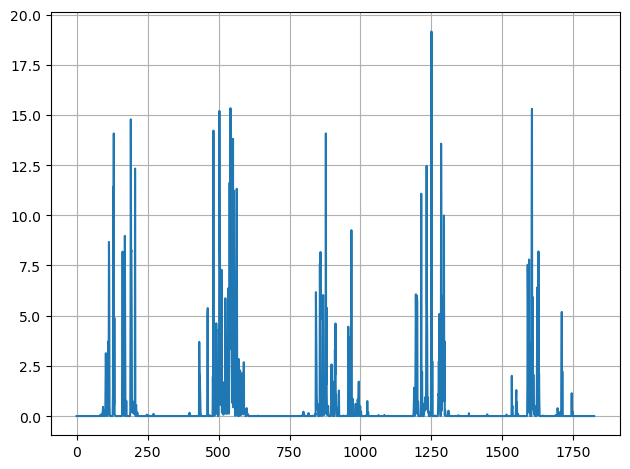

In [5]:
plt.plot(Eadt)

2231.157075227592

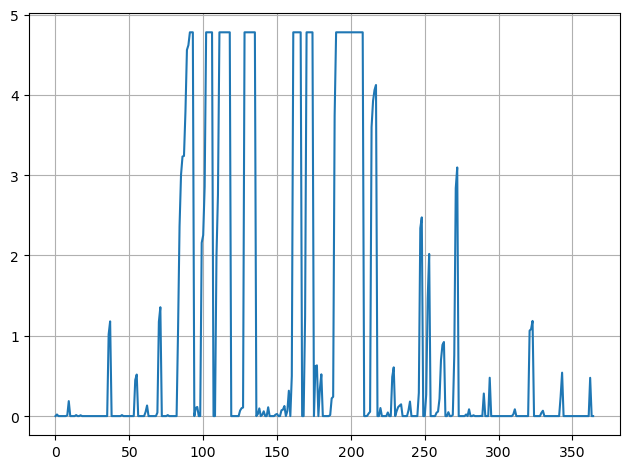

In [6]:
plt.plot(Si[0:365])
np.sum(Si)

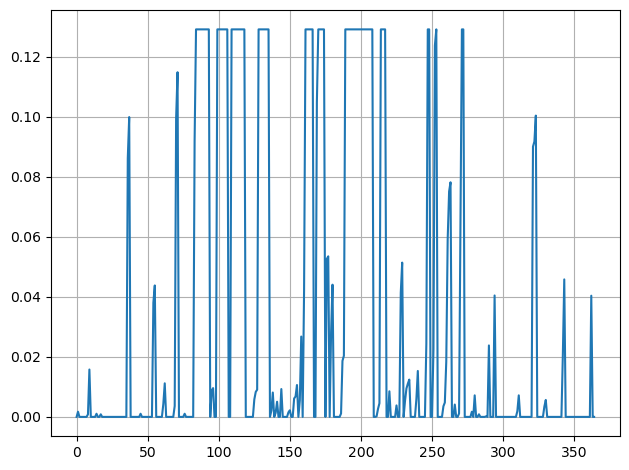

In [7]:
plt.plot(Si_cl[0:365])

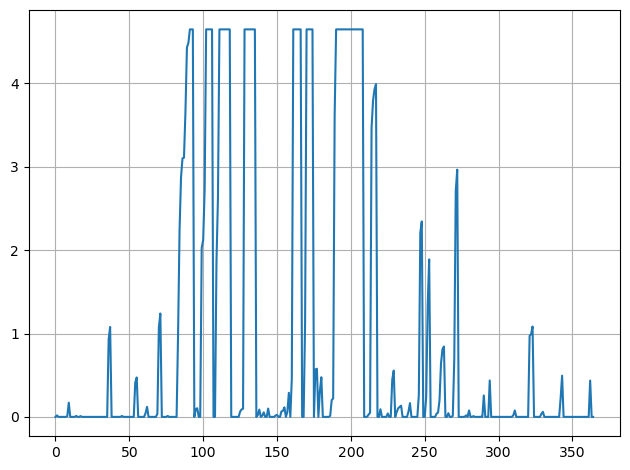

In [8]:
plt.plot(Si_un[0:365])

490.638536383226


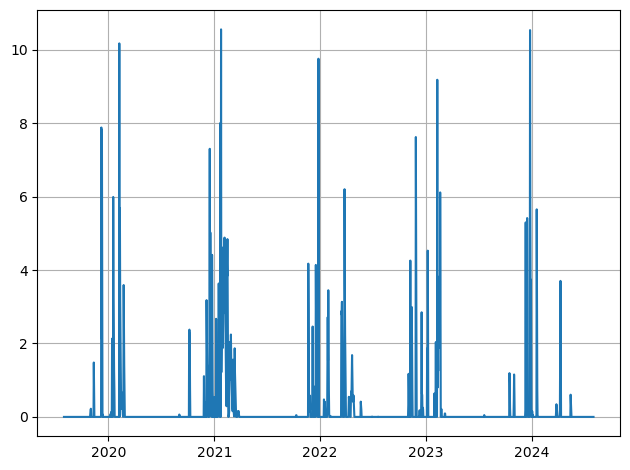

In [9]:
#plt.plot(Su[0:365])
date = pd.to_datetime(df['Date'])
plt.plot(date, Su)
#Runs low during the year, between march and November no storage
#seems to drain very quickly
print(np.sum(Su))

1116.0243886593337


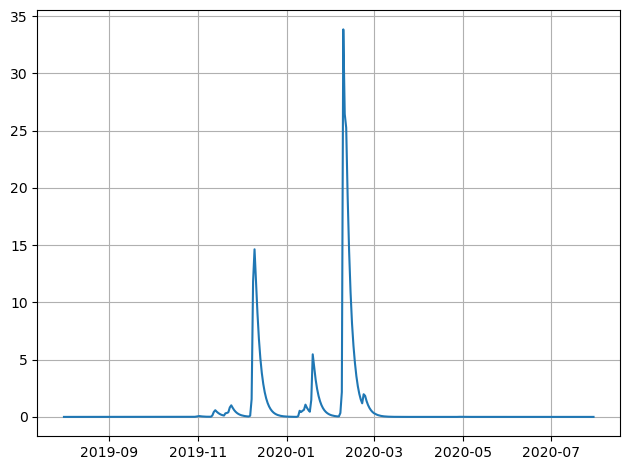

In [10]:
plt.plot(date[0:365], Sf[0:365])
print(np.sum(Sf))

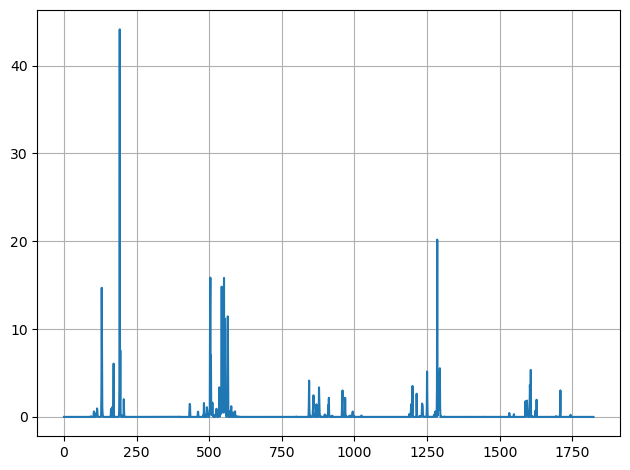

In [11]:
plt.plot(Qufdt)

246668.3211167297


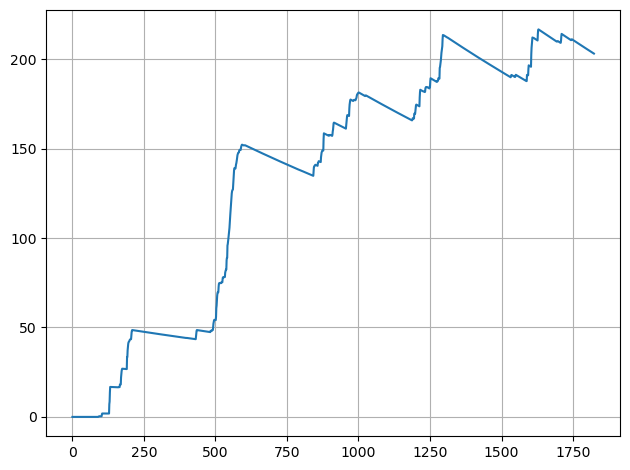

In [12]:
plt.plot(Ss)
print(np.sum(Ss))

In [13]:
# date = pd.to_datetime(df['Date'])

# fig1 = plt.figure()
# ax1 = fig1.add_subplot(111)

# ax1.plot(df['Date'], df['PRCP'], label='Precipitation')
# ax1.plot(df['Date'], df2['POT_EV'], label='Evaporation')


# plt.legend()
# plt.ylabel('mm/d')
# plt.savefig(fname='PREC_EVAP', dpi=300)

In [14]:
# fig2 = plt.figure()
# ax1 = fig2.add_subplot(111)

# ax1.plot(df['Date'], df3['HUMAN'], label='Human')

# plt.ylabel('mm/d')
# plt.legend()
# plt.savefig(fname='HUMAN', dpi=300)

In [15]:
len(df)

1824